<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework1/LinearRegressionp1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [5]:
# Separate features and labels
X1 = df.values[:, 0]  # get input values from first column -- X is a list here
X2 = df.values[:, 1]
X3 = df.values[:, 2]
y = df.values[:, 1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X1)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
m =  100
n =  100


In [6]:
#Prints all
print('X1 = ', X1[: m])
print('X2 = ', X2[: m])
print('X3 = ', X3[: m])
print('y = ', y[: m])


X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474748 3.51515151 3.55555556 3.

X1

In [25]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


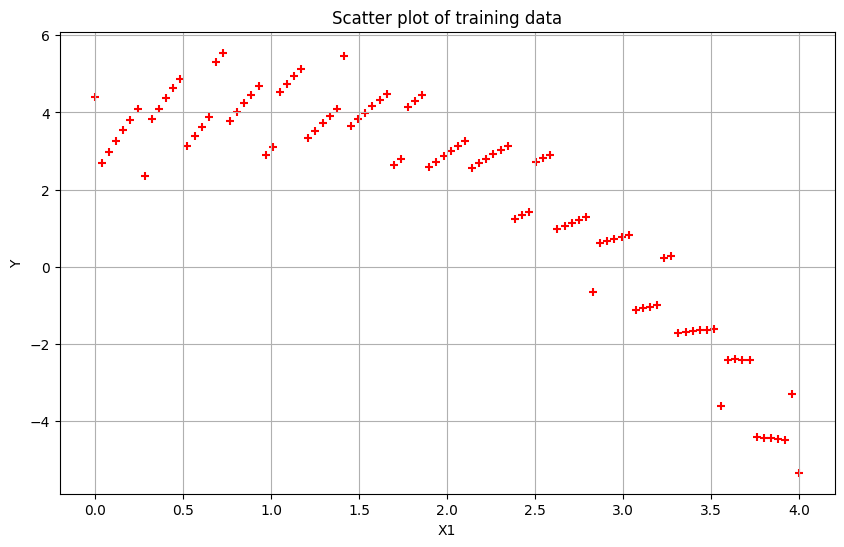

In [26]:
X1 = df.values[:, 0]  # get input values from the first column -- X is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X1, y, color='red', marker='+')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (5, 10)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [27]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [28]:
X_1 = X1.reshape(m, 1)
X_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [29]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X1 = np.hstack((X_0, X_1))
X1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [30]:
theta = np.zeros(2)
theta

array([0., 0.])

In [31]:
def compute_cost(X1, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [32]:
# Lets compute the cost for theta values
cost = compute_cost(X1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [33]:
def gradient_descent(X1, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X1.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X1.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X1, y, theta)

    return theta, cost_history

In [42]:
theta = [0., 0.]
iterations = 400
alpha = 0.07

In [43]:
theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.91671604 -2.03396474]
cost_history = [5.26062949 5.0886633  4.94921983 4.82292459 4.70339718 4.58848582
 4.47741631 4.36986483 4.26565622 4.16466585 4.06678756 3.97192327
 3.87997946 3.79086597 3.70449562 3.62078392 3.53964904 3.46101166
 3.38479489 3.31092423 3.23932745 3.16993456 3.10267772 3.03749118
 2.97431122 2.91307606 2.85372583 2.79620253 2.74044991 2.68641346
 2.63404036 2.58327941 2.53408098 2.48639698 2.44018079 2.39538722
 2.35197249 2.30989415 2.26911106 2.22958336 2.1912724  2.15414073
 2.11815204 2.08327116 2.04946398 2.01669745 1.98493954 1.95415921
 1.92432635 1.89541181 1.86738731 1.84022546 1.81389971 1.78838432
 1.76365434 1.7396856  1.71645467 1.69393883 1.67211607 1.65096506
 1.63046512 1.61059621 1.5913389  1.57267438 1.55458438 1.53705123
 1.52005778 1.50358743 1.48762406 1.47215208 1.45715636 1.44262224
 1.42853551 1.41488239 1.40164954 1.38882403 1.37639331 1.36434523
 1.35266802 1.34135026 1.33038088 1.31974915 1.3094447  1.2994574

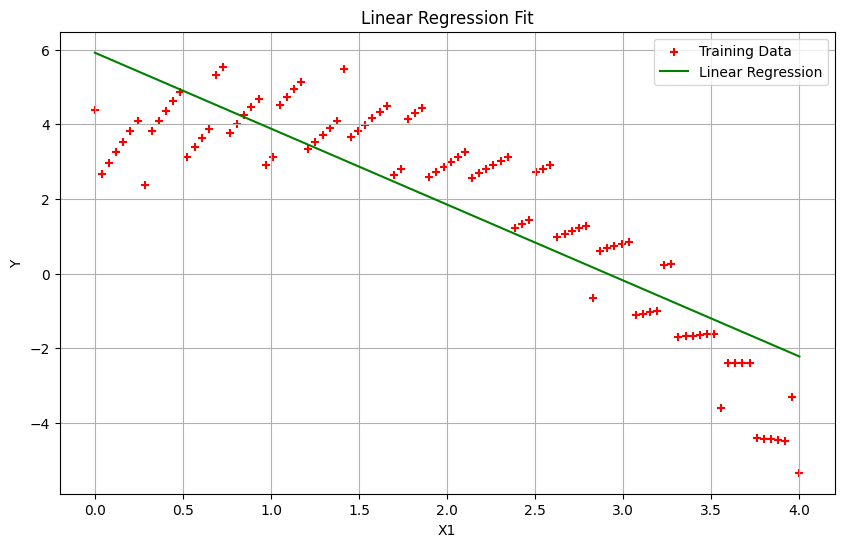

In [44]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X1[:, 1], y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X1[:, 1], X1.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


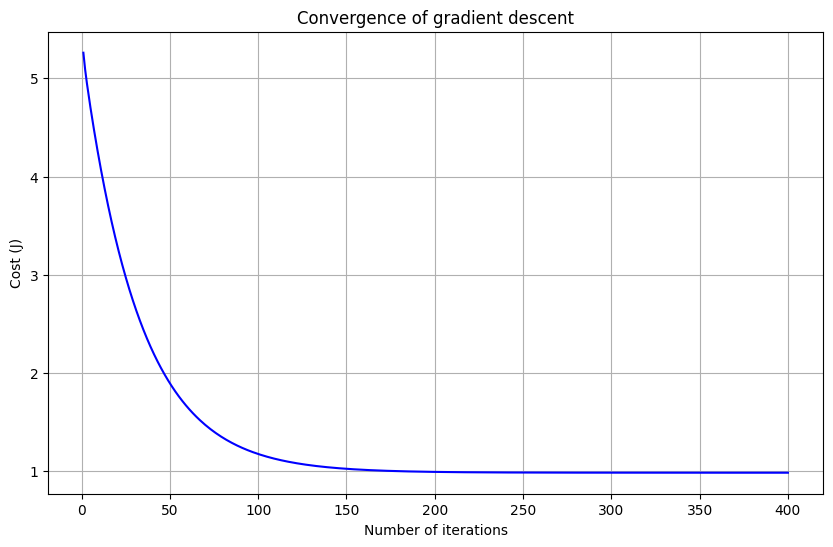

In [45]:


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

X2

In [47]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


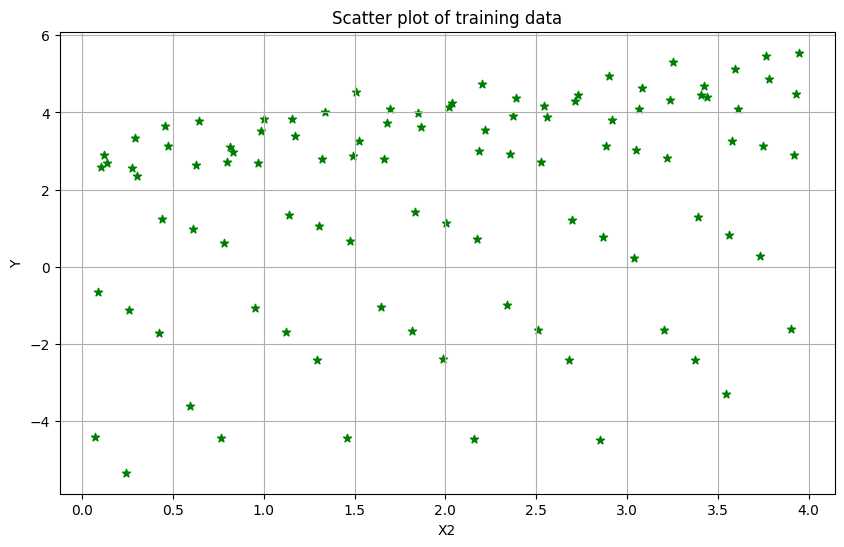

In [48]:
X2 = df.values[:, 1]  # get input values from the first column -- X2 is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X2, y, color='green', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 8)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [49]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [50]:
X_2 = X2.reshape(m, 1)
X_2[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [51]:
# Lets use hstack() function from numpy to stack X_0 and X_2 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X2 = np.hstack((X_0, X_2))
X2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [52]:
theta = np.zeros(2)
theta

array([0., 0.])

In [54]:
def compute_cost(X2, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X2.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [55]:
# Lets compute the cost for theta values
cost = compute_cost(X2, y, theta)
print('The cost for given values of theta_0 and theta_2 =', cost)

The cost for given values of theta_0 and theta_2 = 5.524438459196242


In [56]:
def gradient_descent(X2, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X2.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X2.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X2, y, theta)

    return theta, cost_history

In [57]:
theta = [0., 0.]
iterations = 500
alpha = 0.01

In [58]:
theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.5873825  0.61547444]
cost_history = [5.29831663 5.09909109 4.92356115 4.76890697 4.63264432 4.51258457
 4.40679959 4.31359066 4.23146123 4.15909287 4.09532401 4.03913134
 3.98961331 3.94597567 3.90751868 3.87362588 3.84375417 3.81742507
 3.79421705 3.77375874 3.75572297 3.73982151 3.72580041 3.71343596
 3.70253105 3.69291206 3.684426   3.6769381  3.67032963 3.66449599
 3.65934501 3.65479551 3.65077597 3.64722336 3.64408217 3.64130349
 3.63884423 3.63666642 3.63473663 3.63302538 3.63150672 3.63015778
 3.62895841 3.62789085 3.62693948 3.62609051 3.6253318  3.62465266
 3.62404367 3.62349652 3.62300392 3.6225594  3.6221573  3.62179261
 3.62146092 3.62115837 3.62088152 3.62062736 3.62039324 3.62017681
 3.61997602 3.61978905 3.61961431 3.61945037 3.619296   3.6191501
 3.61901172 3.61887999 3.61875417 3.61863361 3.61851771 3.61840596
 3.61829792 3.61819319 3.6180914  3.61799227 3.6178955  3.61780087
 3.61770816 3.61761718 3.61752776 3.61743977 3.61735307 3.61726755
 

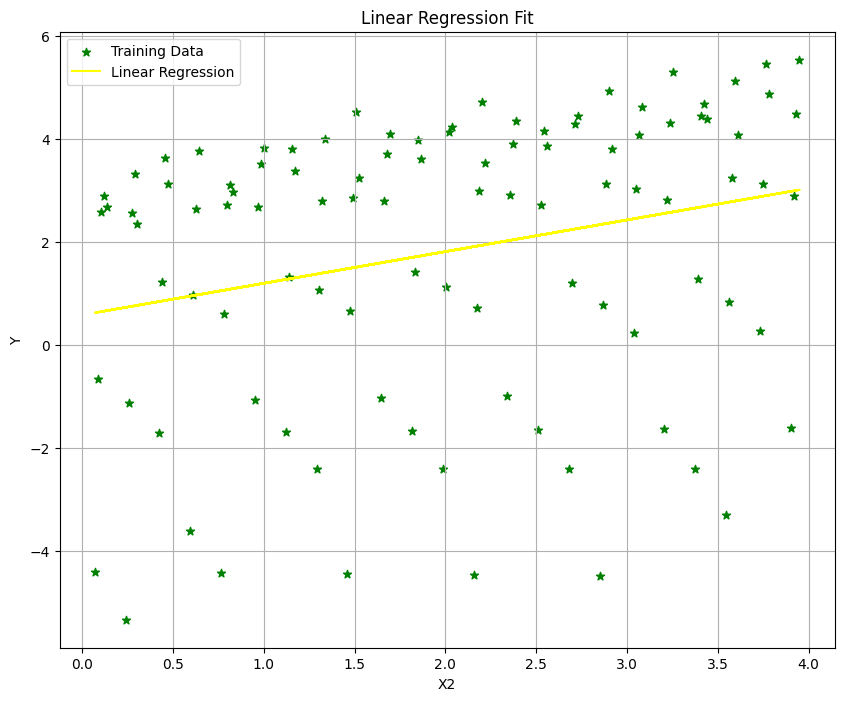

In [59]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X2[:, 1], y, color='green', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X2[:, 1], X2.dot(theta), color='yellow', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


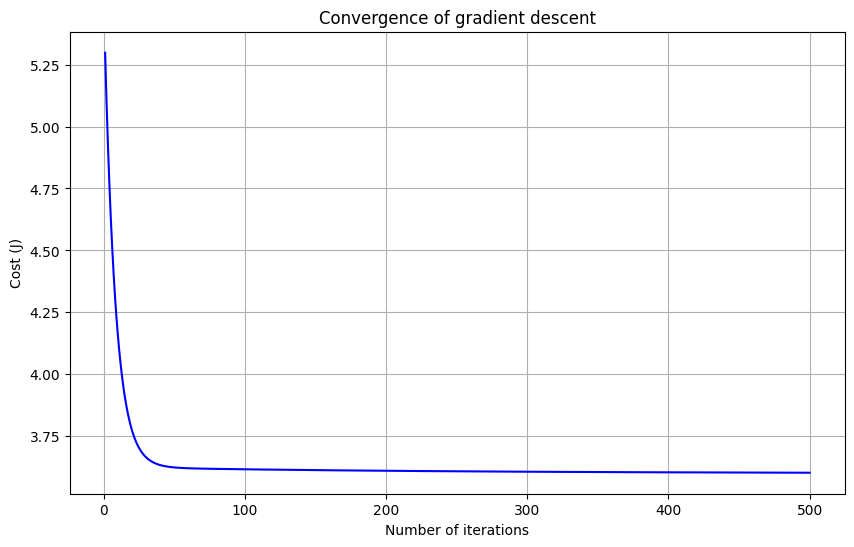

In [60]:


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

X3

In [8]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


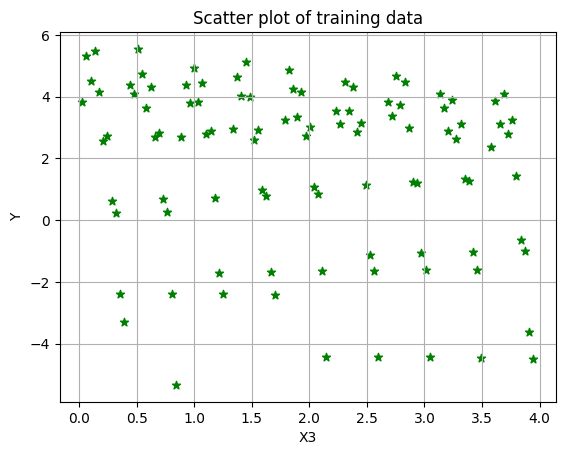

In [9]:
X3 = df.values[:, 2]  # get input values from the first column -- X3 is a list here which is a 1 dimentional array
y = df.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X3, y, color='green', marker='*')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 8)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [10]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X_3 = X3.reshape(m, 1)
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [12]:
# Lets use hstack() function from numpy to stack X_0 and X_3 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X3 = np.hstack((X_0, X_3))
X3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [13]:
theta = np.zeros(2)
theta

array([0., 0.])

In [14]:
def compute_cost(X3, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X3.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [15]:
# Lets compute the cost for theta values
cost = compute_cost(X3, y, theta)
print('The cost for given values of theta_0 and theta_3 =', cost)

The cost for given values of theta_0 and theta_3 = 5.524438459196242


In [16]:
def gradient_descent(X3, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X3.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X3.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X3, y, theta)

    return theta, cost_history

In [21]:
theta = [0., 0.]
iterations = 1500
alpha = 0.055

In [22]:
theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 2.87142208 -0.52048288]
cost_history = [4.96797455 4.70452383 4.57385344 ... 3.62945112 3.62945112 3.62945112]


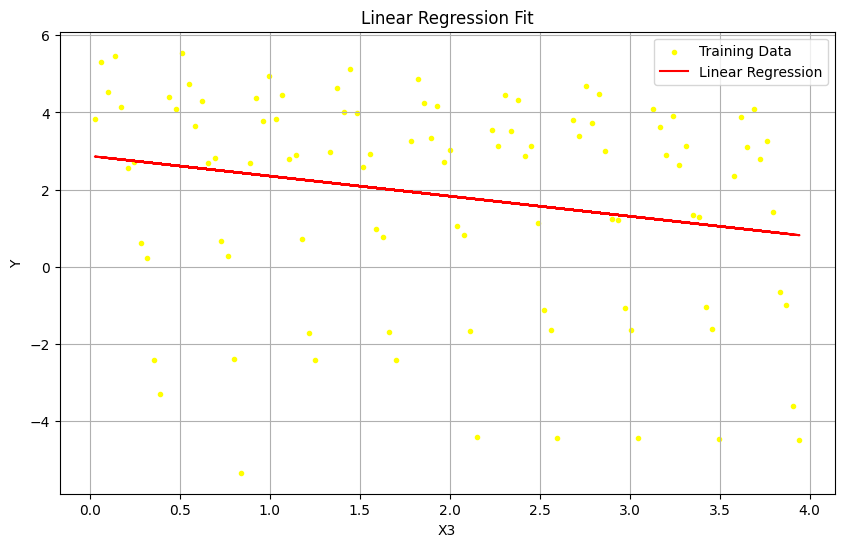

In [23]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X3[:, 1], y, color='yellow', marker='.', label='Training Data')

# Line plot for the linear regression model
plt.plot(X3[:, 1], X3.dot(theta), color='red', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


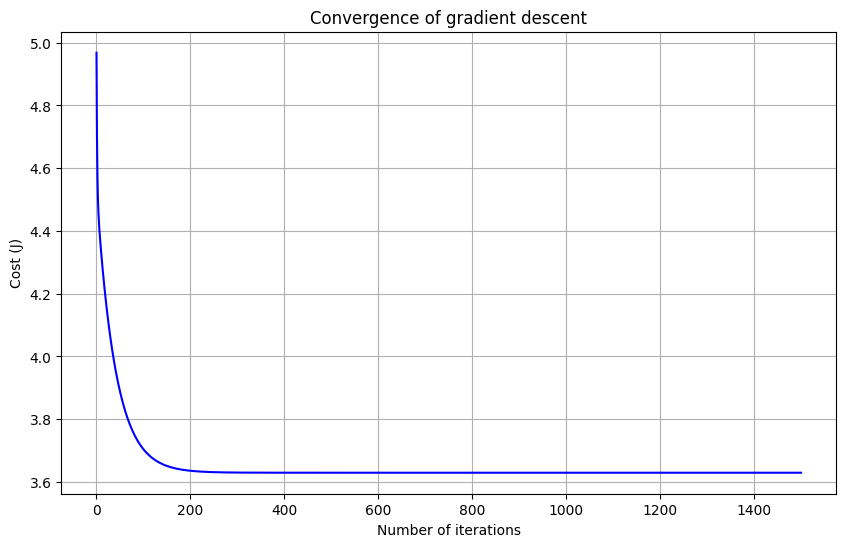

In [24]:


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

3. The Explanatory variable that best fits the output is X1 as the calculated cost converges at .99  where as X2 and X3 converge around 3.5-3.6. Since the purpose of the regression model is to minimize cost.
4. Learning rates don't have much of an impact on the final cost value as the convergence of gradient decent will eventually reach the same value, unless caught in a local minimum. Learning rate does affect how many iterations it takes to reach the convergence point. With a higher learning rate the faster the algorithm will reach the convergence point.


Part 2

In [ ]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [85]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
df = pd.read_csv(url)

X = df[['X1', 'X2', 'X3']].values
y = df['Y'].values

print('X:', X)
print('y:', y)

X: [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]
 [0.2020202  2.91474747 2.68242424]
 [0.24242424 3.60969697 3.13090909]
 [0.28282828 0.30464646 3.57939394]
 [0.32323232 0.99959596 0.02787879]
 [0.36363636 1.69454546 0.47636364]
 [0.4040404  2.38949495 0.92484849]
 [0.44444444 3.08444444 1.37333333]
 [0.48484848 3.77939394 1.82181818]
 [0.52525252 0.47434343 2.27030303]
 [0.56565657 1.16929293 2.71878788]
 [0.60606061 1.86424242 3.16727273]
 [0.64646465 2.55919192 3.61575758]
 [0.68686869 3.25414141 0.06424242]
 [0.72727273 3.94909091 0.51272727]
 [0.76767677 0.6440404  0.96121212]
 [0.80808081 1.3389899  1.40969697]
 [0.84848485 2.03393939 1.85818182]
 [0.88888889 2.72888889 2.30666667]
 [0.92929293 3.42383838 2.75515152]
 [0.96969697 0.11878788 3.20363636]
 [1.01010101 0.81373737 3.65212121]
 [1.05050505 1.50868687 0.10060606]
 [1.09090909 2.20363636 0

In [86]:
X_0 = np.ones((m, 1))
X_multi = np.hstack((X_0, X))
display(X_multi[:5])

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [87]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X_multi.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost_multi(X_multi, y, theta)

    return theta, cost_history

In [90]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(4)

# Define the number of iterations and the learning rate.
iterations = 1000
alpha = 0.05

# Run the gradient descent algorithm.
theta_optimal_multi, cost_history_multi = gradient_descent_multi(X_multi, y, theta, alpha, iterations)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [ 5.27907019 -1.99876124  0.53836289 -0.26045736]


Final optimal theta values for multiple linear regression: [ 5.27907019 -1.99876124  0.53836289 -0.26045736]
Final cost for multiple linear regression: 0.7385298570293829


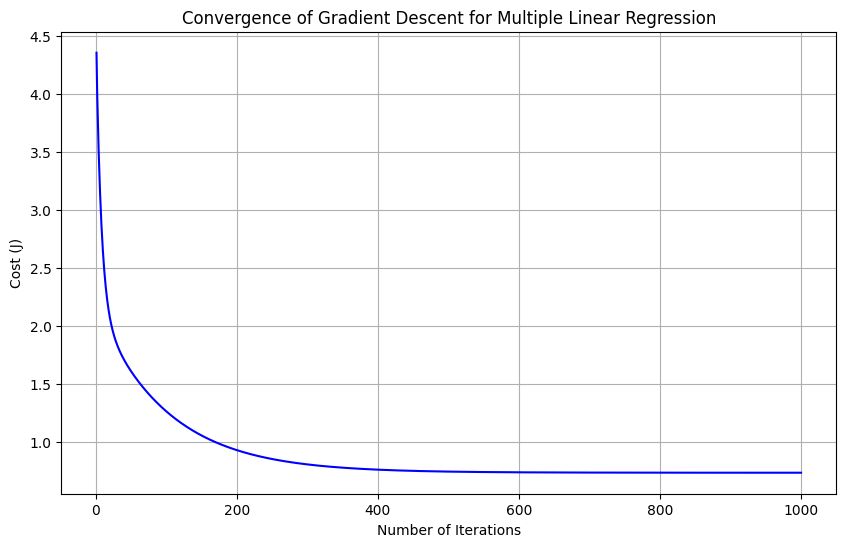

Analysis of model performance:
The final cost value is approximately 0.7385.
This low cost suggests the model has fitted the data well.
The cost history plot shows that the cost has stabilized, indicating that the gradient descent has likely converged.


In [91]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final cost for multiple linear regression:', cost_history_multi[-1])

plt.plot(range(1, iterations + 1), cost_history_multi, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.show()

print("Analysis of model performance:")
print(f"The final cost value is approximately {cost_history_multi[-1]:.4f}.")
if cost_history_multi[-1] < 1:
    print("This low cost suggests the model has fitted the data well.")
else:
    print("The final cost value indicates there is still significant error in the model's predictions.")

if np.diff(cost_history_multi)[-1] < 1e-6 and np.diff(cost_history_multi)[-1] > -1e-6:
    print("The cost history plot shows that the cost has stabilized, indicating that the gradient descent has likely converged.")
else:
    print("The cost history plot shows that the cost is still decreasing, indicating that the gradient descent may not have fully converged.")


In [81]:
# Define new data points for prediction
new_data = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

# Add a column of ones for the bias term. The X_multi in the previous step already includes the bias term.
# So we need to add a column of ones to the new_data as well to match the structure of X_multi.
new_data_with_bias = np.hstack((np.ones((new_data.shape[0], 1)), new_data))


# Calculate predictions using the optimal theta values
predictions_multi = new_data_with_bias.dot(theta_optimal_multi)

# Print the predictions
print('Predictions for new data:', predictions_multi)

Predictions for new data: [ 2.94136408  0.09179843 -0.01275555]
